Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


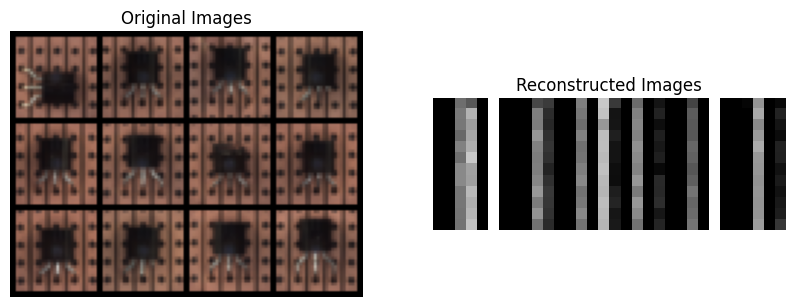

In [3]:
import torch
import matplotlib.pyplot as plt
from data_loader import get_train_loader  
import torchvision
import numpy as np

def unnormalize(image_tensor, mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]):
    """배치에 포함된 모든 이미지 텐서의 색상을 복구합니다."""
    mean = torch.tensor(mean).view(3, 1, 1).to(image_tensor.device)
    std = torch.tensor(std).view(3, 1, 1).to(image_tensor.device)
    image_tensor = image_tensor.clone()  # 원본 데이터를 변경하지 않도록 복제
    image_tensor.mul_(std).add_(mean)  # 각 채널에 대해 역정규화
    return image_tensor


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = torch.jit.load('./model_files/deepSVDD/v1.pt').to(device)
model.eval()  

train_loader = get_train_loader('./datas/test.csv', 64) 
images, _ = next(iter(train_loader))
images = images.to(device)

with torch.no_grad(): 
    reconstructed = model(images)

def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')

images = unnormalize(images)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
imshow(torchvision.utils.make_grid(images.cpu().data[:12], nrow=4))
plt.title('Original Images')

plt.subplot(1, 2, 2)
imshow(torchvision.utils.make_grid(reconstructed.cpu().data[:12], nrow=4))
plt.title('Reconstructed Images')

plt.show()